# Ceneo Analyzer

## Biblioteki

In [59]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## Lista kodów produktów o których zostały pobrane opinie

In [60]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

114700014


## Kod produktu, którego opinie mają zostać przeanalizowane

In [61]:
product_id = input("Proszę podać kod produktu: ")

## Wczytanie do obiektu

In [62]:
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r : r.split("/")[0].replace(",","."), ).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak Rekomendacji" if r is None else r)
opinions

,opinion_id,author,recommendation,rating,content,pros,cons,useful,useless,post_date,purchase_date
0,18536064,A...t,Polecam,5.0,"Długo szukałam, sporo filmików na YT o ujrzała...",[],[],0,0,2024-03-29 11:14:23,2024-03-17 13:45:25
1,17516357,g...a,Polecam,5.0,"Fantastyczny sprzęt, bardzo mocny, lekki i odp...","[dużo końcówek, poręczny, przycisk zasilania, ...",[],0,2,2023-05-17 10:52:54,2023-05-12 09:57:19
2,18499460,j...k,Polecam,4.0,Odkurzacz spełnia wymagania,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],1,0,2024-03-18 08:42:26,2024-03-10 15:49:13
3,18457506,n...2,Polecam,5.0,Produkt super,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2024-03-04 08:34:36,2024-02-17 16:31:32
4,16459243,l...i,Polecam,5.0,Mam w domu psa który zrzuca non stop dużo sier...,"[dużo końcówek, poręczny, przycisk zasilania, ...",[],2,0,2022-08-26 11:17:23,2022-08-21 20:00:27
...,...,...,...,...,...,...,...,...,...,...,...
180,17545591,J...2,Polecam,5.0,Ok,[],[],0,0,2023-05-25 07:24:58,2023-05-07 16:04:38
181,17448760,b...r,Polecam,5.0,ok,"[dużo końcówek, lekki, poręczny, przycisk zasi...",[],0,0,2023-04-26 21:03:39,2023-04-23 10:00:47
182,15826211,Użytkownik Ceneo,Polecam,5.0,"Odkurzacz mały, poręczny przy tym posiada bard...","[lekki, poręczny, przycisk zasilania, wyświetl...",[],0,0,2022-03-15 20:58:40,None
183,18125745,t...l,Nie polecam,2.5,"Odkurza dobrze, niestety bardzo szybko rozłado...","[lekki, poręczny, przycisk zasilania, wyświetl...",[wytrzymała bateria],0,0,2023-11-22 12:40:45,2023-11-10 10:24:44


## Podstawowe statystyki zbioru opinii

In [63]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: 1 if p else 0).sum()
cons_count = opinions.cons.apply(lambda c: 1 if c else 0).sum()
average_rating = opinions.rating.mean()

## Histogram częstości poszczególnych ocen produktu

In [64]:
#rating_distribution = opinions.rating.hist(bins = np.arange(0,5.5,0.5).tolist()) 
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
rating_distribution

rating
0.0      0
0.5      0
1.0      2
1.5      0
2.0      0
2.5      1
3.0      1
3.5      2
4.0     11
4.5     18
5.0    150
Name: count, dtype: int64

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '11'),
 Text(0, 0, '18'),
 Text(0, 0, '150')]

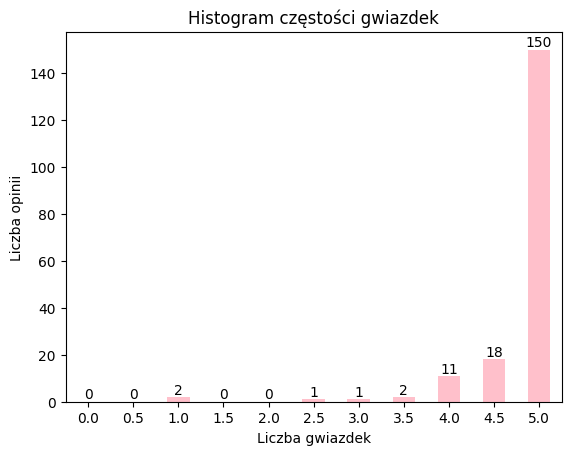

In [65]:
fig, ax= plt.subplots()
rating_distribution.plot.bar(color = "pink")
plt.title("Histogram częstości gwiazdek")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation = 0)
plt.bar_label(ax.containers[0], label_type="edge")

## Udział poszczególnych rekomendacji w opiniach o produkcie

In [68]:
recommendation_distribution = opinions.recommendation.value_counts().reindex(["Polecam", "Nie polecam", "Brak Rekomendacji"])
recommendation_distribution

recommendation
Polecam              179
Nie polecam            3
Brak Rekomendacji      3
Name: count, dtype: int64

<Axes: >

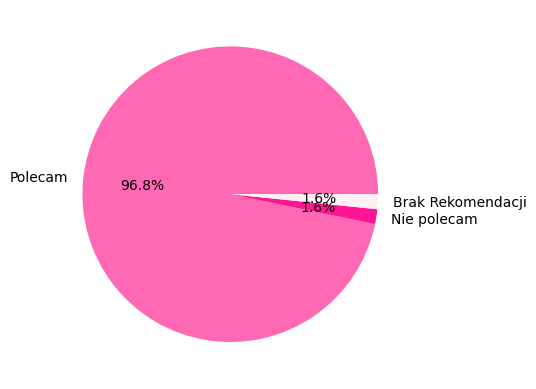

In [70]:
recommendation_distribution.plot.pie(
    colors = ["hotpink", "deeppink", "lavenderblush"],
    autopct = "%1.1f%%",
    label = ""
)